In [1]:
from UTILS.sync_exp import SynWorker
from UTILS.tensor_ops import _2cpu2numpy
import torch
sw = SynWorker('follow')
data = sw.sychronize_internal_hashdict
res = torch.stack([x['data'] for x in data['probs']])
res = _2cpu2numpy(res)
act0_prob = res[..., 0]
act_other_prob = res[..., 1:].sum(-1)



# act0_prob[:,0]
# print(data)


# lambda: self._give_reward_(act, reward_which_act=0, must_has_outlier=True),   # 1.00, 0.00 TypeC


warning, SynWorker init, mod is follow


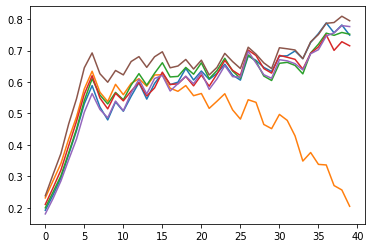

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from UTILS.tensor_ops import repeat_at
act0_prob_mean = act0_prob.mean(-1)
act0_prob_bias = act0_prob - 0# repeat_at(act0_prob_mean,-1,act0_prob.shape[1])
t_start = 20
t_end = 60
for i in range(act0_prob_bias.shape[1]):
    plt.plot(act0_prob_bias[t_start:t_end,i])

# ones = np.ones_like(act0_prob_bias[t_start:t_end,i])
# plt.plot(ones*0.5)


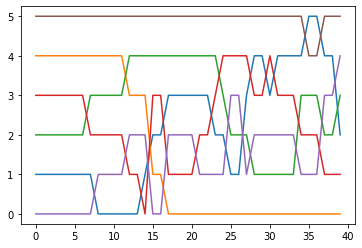

In [9]:
%matplotlib inline
'''
order plot
'''
p = act0_prob_bias[t_start:t_end]
argsort = np.argsort(p, -1)
pp = np.argsort(argsort, -1)
# index_arr = repeat_at(np.arange(7), 0, p.shape[0])


for i in range(pp.shape[1]):
    plt.plot(pp[:,i])

/tmp/ipykernel_3235068/3489523786.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


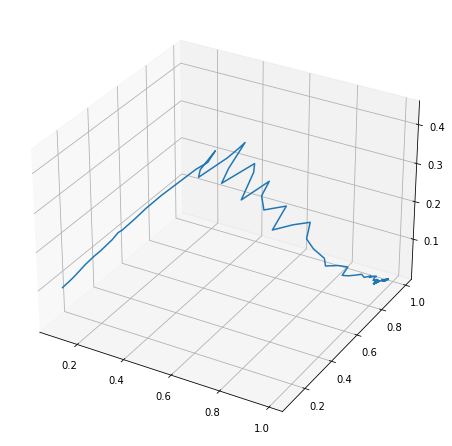

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
plt.plot(act0_prob[:,0],act0_prob[:,1],act0_prob[:,2])

In [35]:
x = np.array([0.1, 2.1, -0.1, 1.1, 3.1]) #[1,3 , 0,2,4]
y = np.argsort(x)
print(y)
z = np.argsort(y)
print(z)


[2 0 3 1 4]
[1 3 0 2 4]
